<a href="https://colab.research.google.com/github/Jushef/Proyectos-ML-DL/blob/main/Aprendizaje%20Supervisado/Classification/wine_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clasificación por tipo de vino

## Datos del vino
Datos de http://archive.ics.uci.edu/ml/datasets/Wine+Quality

### Citas
<pre>
Dua, D. y Karra Taniskidou, E. (2017). 
UCI Machine Learning Repository [http://archive.ics.uci.edu/ml/index.php]. 
Irvine, CA: Universidad de California, Escuela de Ciencias de la Información y Computación.
</pre>

<pre>
P. Cortez, A. Cerdeira, F. Almeida, T. Matos y J. Reis. 
Modelización de las preferencias del vino mediante minería de datos a partir de las propiedades fisicoquímicas.
En Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.
</pre>

Disponible en:
- [@Elsevier](http://dx.doi.org/10.1016/j.dss.2009.05.016)
- [Pre-press (pdf)](http://www3.dsi.uminho.pt/pcortez/winequality09.pdf)
- [bib](http://www3.dsi.uminho.pt/pcortez/dss09.bib)
## Configuración

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

Lee los datos:

In [ ]:
red_wine = pd.read_csv('data/winequality-red.csv')
white_wine = pd.read_csv('data/winequality-white.csv', sep=';')

## EDA

In [ ]:
white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Mirando las puntuaciones de calidad

<AxesSubplot:title={'center':'Puntuación de la calidad del White Wine '}, xlabel='recuento de vinos', ylabel='puntuación de calidad'>

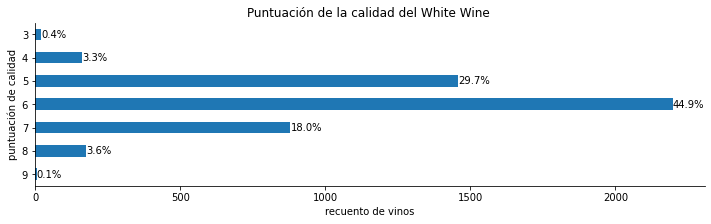

In [ ]:
def plot_quality_scores(df, kind):
    ax = df.quality.value_counts().sort_index().plot.barh(
        title=f'Puntuación de la calidad del {kind.title()} Wine ', figsize=(12, 3)
    )
    ax.axes.invert_yaxis()
    for bar in ax.patches:
        ax.text(
            bar.get_width(), 
            bar.get_y() + bar.get_height()/2, 
            f'{bar.get_width()/df.shape[0]:.1%}',
            verticalalignment='center'
        )
    plt.xlabel('recuento de vinos')
    plt.ylabel('puntuación de calidad')

    for spine in ['top', 'right']:
        ax.spines[spine].set_visible(False)

    return ax

plot_quality_scores(white_wine, 'white')

<AxesSubplot:title={'center':'Puntuación de la calidad del Red Wine '}, xlabel='recuento de vinos', ylabel='puntuación de calidad'>

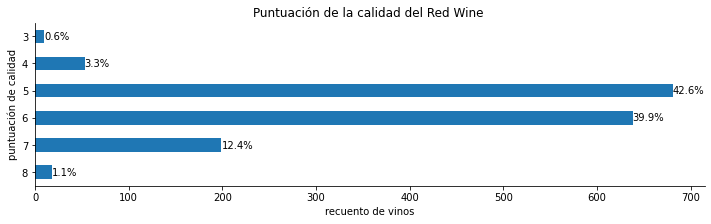

In [ ]:
plot_quality_scores(red_wine, 'red')

### Combinación de datos de vino tinto y blanco

In [ ]:
wine = pd.concat([
    white_wine.assign(kind='white'), red_wine.assign(kind='red')
])
wine.sample(5, random_state=10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,kind
848,6.4,0.64,0.21,1.8,0.081,14.0,31.0,0.99689,3.59,0.66,9.8,5,red
2529,6.6,0.42,0.13,12.8,0.044,26.0,158.0,0.99772,3.24,0.47,9.0,5,white
131,5.6,0.50,0.09,2.3,0.049,17.0,99.0,0.99370,3.63,0.63,13.0,5,red
244,15.0,0.21,0.44,2.2,0.075,10.0,24.0,1.00005,3.07,0.84,9.2,7,red
1551,6.6,0.19,0.99,1.2,0.122,45.0,129.0,0.99360,3.09,0.31,8.7,6,white


No hay datos nulos:

In [ ]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  kind                  6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB


Tenemos más blancos que rojos:

In [ ]:
wine.kind.value_counts()

white    4898
red      1599
Name: kind, dtype: int64

Queremos saber si las propiedades químicas pueden utilizarse para determinar el tipo de vino. Por desgracia, `describe()` da una salida muy larga, así que necesitamos una visualización para comparar los vinos de esta manera:

In [ ]:
wine.drop(columns='quality').groupby('kind').describe()

fixed acidity                                                \
              count      mean       std  min  25%  50%  75%   max   
kind                                                                
red          1599.0  8.319637  1.741096  4.6  7.1  7.9  9.2  15.9   
white        4898.0  6.854788  0.843868  3.8  6.3  6.8  7.3  14.2   

      volatile acidity            ... sulphates       alcohol             \
                 count      mean  ...       75%   max   count       mean   
kind                              ...                                      
red             1599.0  0.527821  ...      0.73  2.00  1599.0  10.422983   
white           4898.0  0.278241  ...      0.55  1.08  4898.0  10.514267   

                                             
            std  min  25%   50%   75%   max  
kind                                         
red    1.065668  8.4  9.5  10.2  11.1  14.9  
white  1.230621  8.0  9.5  10.4  11.4  14.2  

[2 rows x 88 columns]

### ¿Cómo se correlacionan las propiedades químicas del vino entre sí y con el tipo de vino?
Es importante realizar una exploración en profundidad de los datos antes de modelarlos. Esto incluye consultar a expertos en el tema, buscar correlaciones entre las variables, examinar las distribuciones, etc. Una visualizacion es el mapa de calor. Para predecir si el vino es tinto o blanco, buscaríamos correlaciones entre las propiedades químicas y el tipo de vino. También intentaríamos ver si hay una diferencia en la distribución de nuestras variables para los vinos blancos frente a los tintos. Otros tipos de gráficos útiles son los gráficos de caja, los gráficos de pares y la matriz de dispersión. 

<AxesSubplot:>

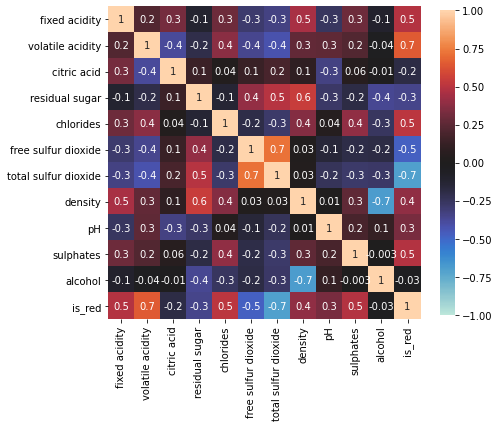

In [ ]:
fig = plt.figure(figsize=(7, 7))
sns.heatmap(
    wine.drop(columns='quality').assign(
        is_red=lambda x: np.where(x.kind == 'red', 1, 0)
    ).corr(), 
    cbar_kws={'shrink': 0.8},
    center=0, vmin=-1, vmax=1,
    square=True, annot=True, fmt='.1g'
)

### Comparación de vinos tintos y blancos según sus propiedades químicas
Esta visualización será más fácil de digerir que la salida de `describe()`:

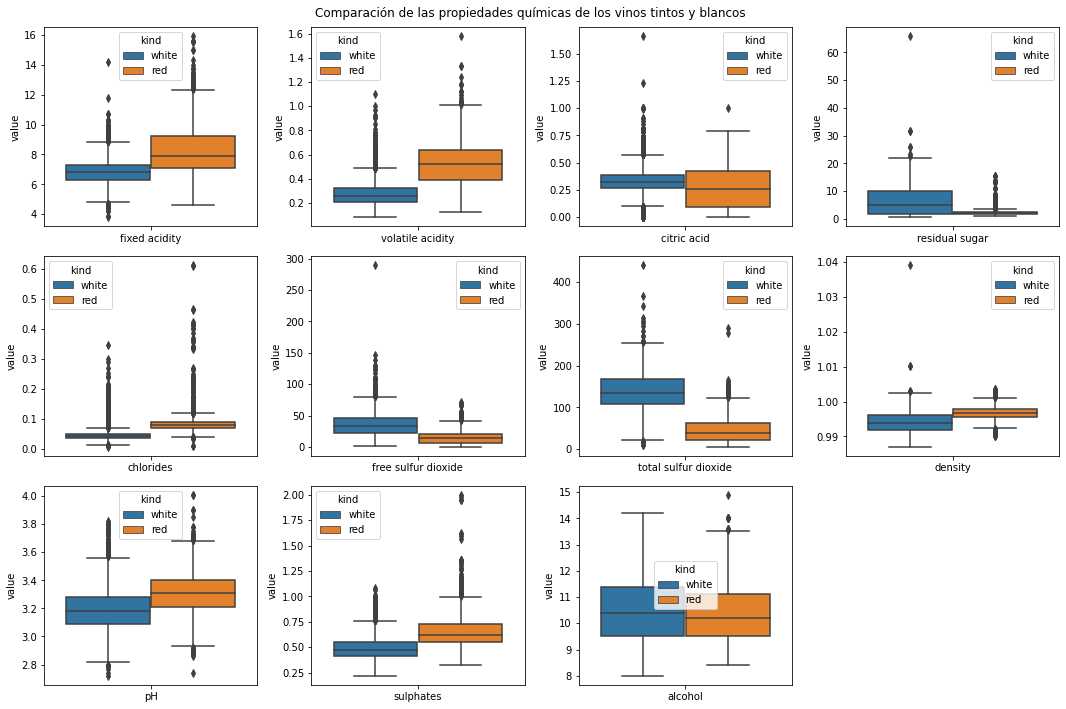

In [ ]:
import math

chemical_properties = [col for col in wine.columns if col not in ['quality', 'kind']]
melted = wine.drop(columns='quality').melt(id_vars=['kind'])

fig, axes = plt.subplots(math.ceil(len(chemical_properties) / 4), 4, figsize=(15, 10))
axes = axes.flatten()

for prop, ax in zip(chemical_properties, axes):
    sns.boxplot(
        data=melted[melted.variable.isin([prop])], 
        x='variable', y='value', hue='kind', ax=ax
    ).set_xlabel('')
    
# eliminar las subtramas adicionales
for ax in axes[len(chemical_properties):]:
    ax.remove()

plt.suptitle('Comparación de las propiedades químicas de los vinos tintos y blancos')
plt.tight_layout()

## Clasificación de los vinos tintos y blancos
1. separar x e y
2. obtener el conjunto de entrenamiento y de prueba

In [ ]:
from sklearn.model_selection import train_test_split

# 1
wine_y = np.where(wine.kind == 'red', 1, 0)
wine_X = wine.drop(columns=['quality', 'kind'])

# 2
w_X_train, w_X_test, w_y_train, w_y_test = train_test_split(
    wine_X, wine_y, test_size=0.25, random_state=0, stratify=wine_y
)

3. construir un pipeline con escalador estándar seguido de regresión logística y ajustar el modelo

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

white_or_red = Pipeline([
    ('scale', StandardScaler()), 
    ('lr', LogisticRegression(random_state=0))
]).fit(w_X_train, w_y_train)

4. hacer predicciones

In [ ]:
kind_preds = white_or_red.predict(w_X_test)

5. evaluar las predicciones

Podemos utilizar una matriz de confusión para ver cómo se alinean las predicciones del modelo con las etiquetas de clase reales. El modelo sólo hizo 13 predicciones incorrectas; las estudiaremos en el capítulo 10:

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Actual', ylabel='Model Prediction'>

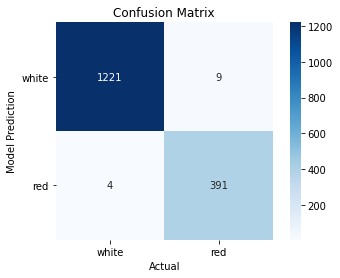

In [ ]:
from ml_utils.classification import confusion_matrix_visual

confusion_matrix_visual(w_y_test, kind_preds, ['white', 'red'])

Precision, recall, y $F_1$ score todo se ve bien con este modelo:

In [ ]:
from sklearn.metrics import classification_report
print(f'Clssification Report: \n{classification_report(w_y_test, kind_preds)}')

Clssification Report: 
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1225
           1       0.99      0.98      0.98       400

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625



Otra forma de utilizar la matriz de confusión es con la sensibilidad y la especificidad:

<AxesSubplot:title={'center':'Portion of Confusion Matrix Considered'}, xlabel='Actual', ylabel='Predicted'>

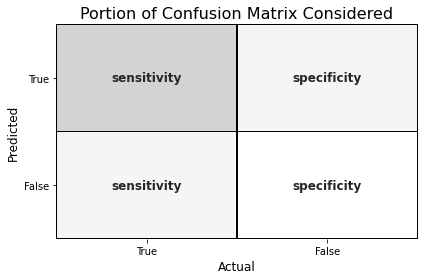

In [ ]:
from visual_aids import ml_viz
ml_viz.portion_of_confusion_matrix_considered({'sensitivity', 'specificity'})

Los gráficos de sensibilidad-especificidad trazan la sensibilidad (TPR) frente a la 1-especificidad (FPR) y son otra forma de evaluar el rendimiento. Incluyen todas las secciones de la matriz de confusión, por lo que en los casos de equilibrio de clases, son optimistas del rendimiento. Estos gráficos también se denominan curvas ROC.

### Curvas ROC
Visualizan el rendimiento del modelo mediante las tasas de verdaderos positivos y de falsos positivos. El área bajo la curva está en el rango [0, 1], siendo 1 el mejor. Esta visualización nos permite comparar nuestro modelo con la línea de base de adivinación aleatoria (la línea diagonal con AUC de 0,5), así como con otros modelos:

<AxesSubplot:title={'center':'Sample ROC Curves'}, xlabel='False Positive Rate (FPR)', ylabel='True Positive Rate (TPR)'>

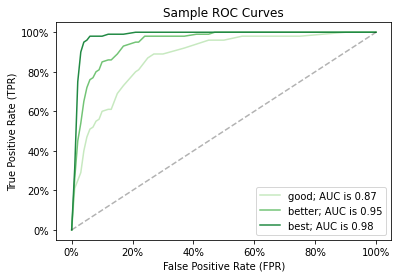

In [ ]:
ml_viz.roc_curve()

Este modelo funciona muy bien, el área bajo la curva (AUC) es casi 1:

<AxesSubplot:title={'center':'ROC curve'}, xlabel='False Positive Rate (FPR)', ylabel='True Positive Rate (TPR)'>

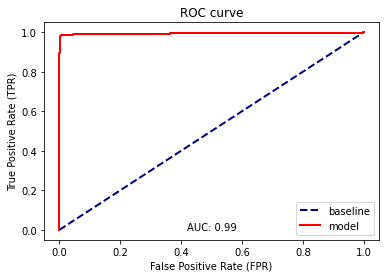

In [ ]:
from ml_utils.classification import plot_roc

plot_roc(w_y_test, white_or_red.predict_proba(w_X_test)[:,1])

### Curvas de precisión-recuerdo
Cuando nos enfrentamos a un desequilibrio de clases, utilizamos las curvas de precisión-recuperación, ya que las curvas ROC serán optimistas respecto al rendimiento del modelo. AP es la precisión media ponderada y AUC es el área bajo la curva, de nuevo en el rango [0, 1]. La línea de base es ahora el porcentaje de observaciones que pertenecen a la clase positiva. Los valores por debajo de esta línea son peores que los aleatorios:

<AxesSubplot:title={'center':'Precision-recall curve\n AP: 0.99 | AUC: 0.99'}, xlabel='Recall', ylabel='Precision'>

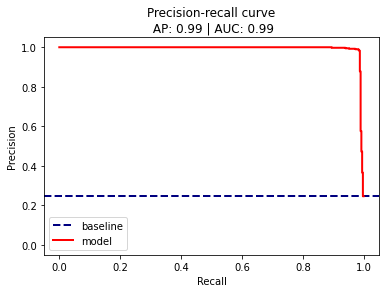

In [ ]:
from ml_utils.classification import plot_pr_curve

plot_pr_curve(w_y_test, white_or_red.predict_proba(w_X_test)[:,1])